        Name: Prabin Sapkota
        StudentId: 1928598

In [1]:
import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
labels = pd.read_csv('labels.csv')
labels.head()

,Unnamed: 0,Image,Label
0,0,Car0.jpg,0
1,1,Car1.jpg,0
2,2,Car10.jpg,0
3,3,Car100.jpg,0
4,4,Car101.jpg,0


csv file was made and then the given dataset images were labelled with image name and label as 0 and 1

In [3]:
#separating cars data
car_data = labels[labels['Label']==0]
car_data.head()

,Unnamed: 0,Image,Label
0,0,Car0.jpg,0
1,1,Car1.jpg,0
2,2,Car10.jpg,0
3,3,Car100.jpg,0
4,4,Car101.jpg,0


data were separated for two classes plane and car. Label 0 was assigned to Car class.

In [4]:
# Splitting car data into train and test
test_car_data = car_data.iloc[-3:,:]
train_car_data = car_data.iloc[:-3,:]

splitting train test set for a particular class. 3 image from car class was separated for testing

In [5]:
#separating plane data
plane_data = labels[labels['Label']==1]
plane_data.head()

,Unnamed: 0,Image,Label
200,200,Plane0.jpg,1
201,201,Plane1.jpg,1
202,202,Plane10.jpg,1
203,203,Plane100.jpg,1
204,204,Plane101.jpg,1


In [6]:
# Splitting plane data into train and test
test_plane_data = plane_data.iloc[-3:,:]
train_plane_data = plane_data.iloc[:-3,:]

In [7]:
# total test data
test_indices = test_plane_data.index.tolist() + test_car_data.index.tolist()
test_data = labels.iloc[test_indices,:]

In [8]:
# total train data
train_data = pd.concat([labels, test_data, test_data]).drop_duplicates(keep=False)

In [9]:
path = 'C:/Users/USER/Downloads/dataset/dataset/train/'

In [10]:
training_data_filename_list = train_data['Image'].values.tolist()
testing_data_filename_list = test_data['Image'].values.tolist()
train_image_name = []
test_image_name = []
#path = path + 'images/'
for file in training_data_filename_list:
    train_image_name.append(path+file)
for file in testing_data_filename_list:
    test_image_name.append(path+file)

In [11]:
train_image_name[2]

'C:/Users/USER/Downloads/dataset/dataset/train/Car10.jpg'

In [12]:
# preparing data by processing images using opencv
ROWS = 64
COLS = 64
CHANNELS = 3

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR) #cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count,ROWS, COLS,CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
    return data

train = prep_data(train_image_name)
test = prep_data(test_image_name)

In [13]:
print(train.shape)

(394, 64, 64, 3)


In [14]:
optimizer = RMSprop(lr=1e-4)
model = Sequential()

model.add(Conv2D(32, 3, 3, border_mode='same', input_shape=(ROWS, COLS,3), activation='relu'))
model.add(Conv2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(128, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(256, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, 3, 3, border_mode='same', activation='relu'))
model.add(Conv2D(512, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  """
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  if __name__ == '__main__':
C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", 

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)      

In [16]:
labels = train_data.iloc[:,2].values.tolist()
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [17]:
model.fit(train, labels, batch_size=50, epochs=30,
              validation_split=0.25, verbose=1, shuffle=True)

Train on 295 samples, validate on 99 samples
Epoch 1/30
295/295 [==============================] - 11s 39ms/step - loss: 0.9730 - accuracy: 0.6169 - val_loss: 1.5456 - val_accuracy: 0.0000e+00
Epoch 2/30
295/295 [==============================] - 11s 36ms/step - loss: 0.6717 - accuracy: 0.6475 - val_loss: 0.9273 - val_accuracy: 0.0000e+00
Epoch 3/30
295/295 [==============================] - 10s 36ms/step - loss: 0.5749 - accuracy: 0.7119 - val_loss: 0.8656 - val_accuracy: 0.1616
Epoch 4/30
295/295 [==============================] - 11s 36ms/step - loss: 0.5904 - accuracy: 0.6915 - val_loss: 0.7013 - val_accuracy: 0.5657
Epoch 5/30
295/295 [==============================] - 11s 36ms/step - loss: 0.5833 - accuracy: 0.7153 - val_loss: 0.4779 - val_accuracy: 0.9899
Epoch 6/30
295/295 [==============================] - 11s 36ms/step - loss: 0.5947 - accuracy: 0.6746 - val_loss: 1.0395 - val_accuracy: 0.2424
Epoch 7/30
295/295 [==============================] - 11s 36ms/step - loss: 0.5555 

In [18]:
predictions = model.predict(test)
predictions

array([[9.9992704e-01],
       [9.9998152e-01],
       [9.9993587e-01],
       [6.8866815e-05],
       [3.9701820e-03],
       [1.5912676e-04]], dtype=float32)

I am 99.99% sure this is a plane


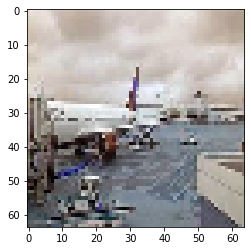

I am 100.00% sure this is a plane


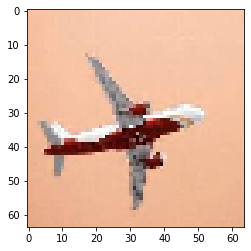

I am 99.99% sure this is a plane


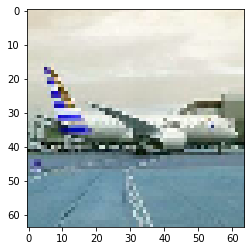

I am 99.99% sure this is a Car


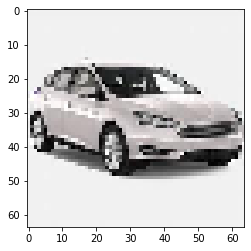

I am 99.60% sure this is a Car


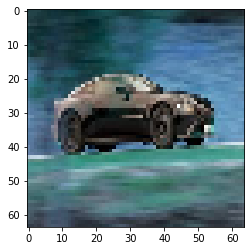

I am 99.98% sure this is a Car


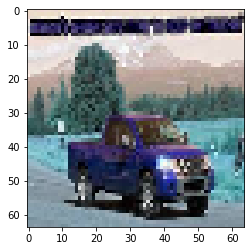

In [19]:
for i in range(0,6):
    if predictions[i, 0] >= 0.5: 
        print('I am {:.2%} sure this is a plane'.format(predictions[i][0]))
    else: 
        print('I am {:.2%} sure this is a Car'.format(1-predictions[i][0]))
        
    plt.imshow(test[i])
    plt.show()

This model was made for binary classification where the two classes plane and car has to be predicted. The model was tested on the 6 images that were splitted in the beginning for testing purpose from both the classes. And on all the 6 images the model showed accurate result with high accuracy. 
previously, the model showed little less accuracy when there were 4 convolutional layer and the epochs were 20 but later on increasing the one more convolutional layer and epochs to 30 the model showed great accuracy on both training and testing dataset.

In [20]:
model.save('C:/Users/USER/Downloads/dataset/dataset/train/models/my_model.h5')

In [33]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [22]:
loaded_model = load_model('C:/Users/USER/Downloads/dataset/dataset/train/models/my_model.h5')

File loaded and reshaped. The new shape is  (1, 64, 64, 3)
Start predicting...
[[0.9217448]]
Prediction completed: this is a Plane


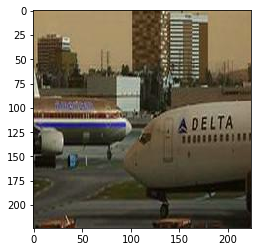

In [34]:
        img = cv2.imread('C:/Users/USER/Downloads/dataset/dataset/test/planes/Plane2.jpg')
        plt.imshow(img)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
        img = cv2.resize(img, (64, 64))
        #img = np.expand_dims(img, axis = 0)
        img = np.reshape(img, [1, 64, 64, 3])
        print("File loaded and reshaped. The new shape is ", img.shape)
        print("Start predicting...")
        predictions = loaded_model.predict(img)
        print(predictions)
        if predictions >= 0.5:
            predictions = 'Plane'
        else:
            predictions = 'Car'

        print( "Prediction completed: this is a", predictions)
       
        
